In [79]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
%matplotlib inline


In [80]:
df = pd.read_csv(
    "https://raw.githubusercontent.com/codebasics/deep-learning-keras-tf-tutorial/refs/heads/master/11_chrun_prediction/customer_churn.csv")

In [81]:
df.drop("customerID", axis='columns', inplace=True)

In [82]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
df.TotalCharges = df.TotalCharges.fillna(df.TotalCharges.mean())

In [83]:
df.TotalCharges.dtypes

dtype('float64')

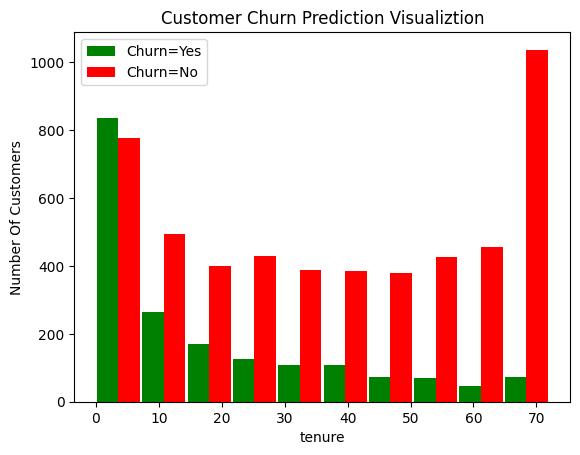

In [84]:
tenure_churn_no = df[df.Churn == 'No'].tenure
tenure_churn_yes = df[df.Churn == 'Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

blood_sugar_men = [113, 85, 90, 150, 149, 88, 93, 115, 135, 80, 77, 82, 129]
blood_sugar_women = [67, 98, 89, 120, 133, 150, 84, 69, 89, 79, 120, 112, 100]

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95,
         color=['green', 'red'], label=['Churn=Yes', 'Churn=No'])
plt.legend()

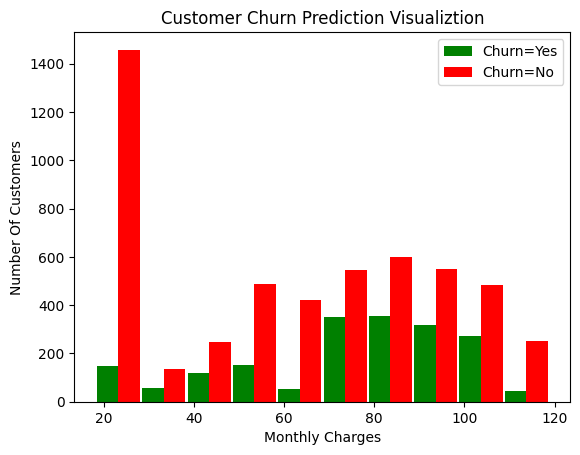

In [85]:
mc_churn_no = df[df.Churn == 'No'].MonthlyCharges
mc_churn_yes = df[df.Churn == 'Yes'].MonthlyCharges

plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

blood_sugar_men = [113, 85, 90, 150, 149, 88, 93, 115, 135, 80, 77, 82, 129]
blood_sugar_women = [67, 98, 89, 120, 133, 150, 84, 69, 89, 79, 120, 112, 100]

plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=[
         'green', 'red'], label=['Churn=Yes', 'Churn=No'])
plt.legend()

In [86]:
def print_unique_col_values(df):
    for column in df:
        if df[column].dtypes == 'object':
            print(f'{column}: {df[column].unique()}')

In [87]:
print_unique_col_values(df  )

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [88]:
df.replace('No internet service', 'No', inplace=True)
df.replace('No phone service', 'No', inplace=True)

In [89]:
print_unique_col_values(df)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [90]:
yes_no_columns = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
                  'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']
for col in yes_no_columns:
    df.replace({col: {'Yes': 1, 'No': 0}}, inplace=True)

/var/folders/t3/nm83g8h503z84m15krycwrs00000gn/T/ipykernel_1275/2673451355.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({col: {'Yes': 1, 'No': 0}}, inplace=True)


In [91]:
for col in df:
    print(f'{col}: {df[col].unique()}')

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [92]:
df['gender'] = df['gender'].replace({'Male': 1, 'Female': 0}).infer_objects(copy=False)

/var/folders/t3/nm83g8h503z84m15krycwrs00000gn/T/ipykernel_1275/2660575310.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['gender'] = df['gender'].replace({'Male': 1, 'Female': 0}).infer_objects(copy=False)


In [93]:
df.gender.unique()

array([0, 1])

In [94]:
df2 = pd.get_dummies(data=df, columns=[
                     'InternetService', 'Contract', 'PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [95]:
from sklearn.preprocessing import MinMaxScaler
cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [96]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

gender: [0 1]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.01388889 0.47222222 0.02777778 0.625      0.11111111 0.30555556
 0.13888889 0.38888889 0.86111111 0.18055556 0.22222222 0.80555556
 0.68055556 0.34722222 0.95833333 0.72222222 0.98611111 0.29166667
 0.16666667 0.41666667 0.65277778 1.         0.23611111 0.375
 0.06944444 0.63888889 0.15277778 0.97222222 0.875      0.59722222
 0.20833333 0.83333333 0.25       0.91666667 0.125      0.04166667
 0.43055556 0.69444444 0.88888889 0.77777778 0.09722222 0.58333333
 0.48611111 0.66666667 0.40277778 0.90277778 0.52777778 0.94444444
 0.44444444 0.76388889 0.51388889 0.5        0.56944444 0.08333333
 0.05555556 0.45833333 0.93055556 0.31944444 0.79166667 0.84722222
 0.19444444 0.27777778 0.73611111 0.55555556 0.81944444 0.33333333
 0.61111111 0.26388889 0.75       0.70833333 0.36111111 0.
 0.54166667]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: 

In [97]:

from sklearn.model_selection import train_test_split
X = df2.drop('Churn', axis='columns')
y = df2['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=5)

In [98]:
len(X_train.columns)

26

In [99]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Input(shape=(26,)),
    keras.layers.Dense(26, activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [100]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [101]:
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 407us/step - accuracy: 0.7556 - loss: 0.4827
Epoch 2/5
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 407us/step - accuracy: 0.7556 - loss: 0.4827
Epoch 2/5
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step - accuracy: 0.7943 - loss: 0.4298
Epoch 3/5
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step - accuracy: 0.7943 - loss: 0.4298
Epoch 3/5
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step - accuracy: 0.7989 - loss: 0.4222
Epoch 4/5
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step - accuracy: 0.7989 - loss: 0.4222
Epoch 4/5
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step - accuracy: 0.8024 - loss: 0.4186
Epoch 5/5
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step - accuracy: 0.8024 - loss: 0.4186
Epoch 5/5
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step - accuracy: 0.8060 - loss: 0.4162
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step - accuracy: 0.8060 - loss: 0.4162


In [102]:
yes_no_columns = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
                  'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']
for col in yes_no_columns:
    df.replace({col: {'Yes': 1, 'No': 0}}, inplace=True)

In [103]:
model.evaluate(X_test, y_test)

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step - accuracy: 0.7850 - loss: 0.4304
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step - accuracy: 0.7850 - loss: 0.4304


[0.4304288327693939, 0.7849538922309875]

In [104]:
yp = model.predict(X_test)
yp[:5]

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 549us/step
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 549us/step


array([[0.3805871 ],
       [0.5610841 ],
       [0.49188778],
       [0.6799561 ],
       [0.1750879 ]], dtype=float32)

In [105]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1023
           1       0.61      0.60      0.61       386

    accuracy                           0.78      1409
   macro avg       0.73      0.73      0.73      1409
weighted avg       0.78      0.78      0.78      1409



Text(95.72222222222221, 0.5, 'Truth')

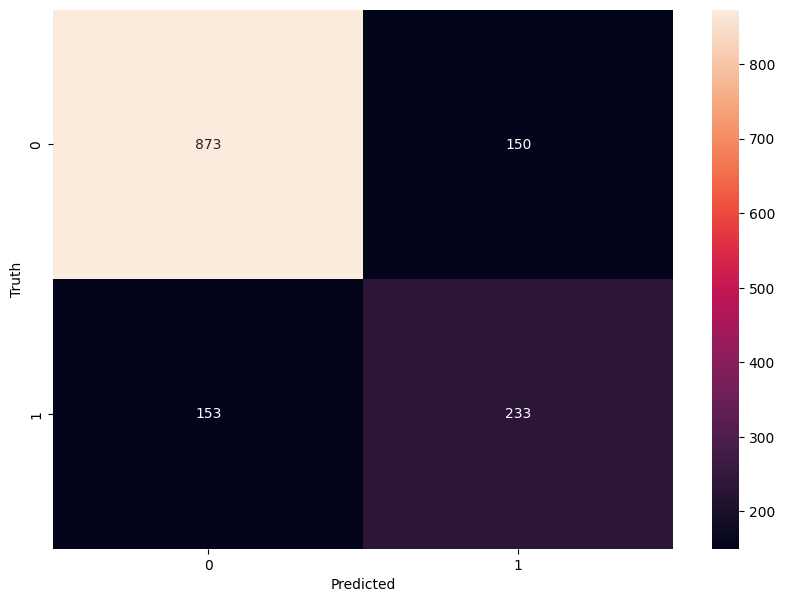

In [107]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)

plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')